# WeRateDogs

## Gathering

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re


In [2]:
# Leitura do CSV fornecido
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Usando requests para fazer download do arquivo (image_predictions.tsv) está hospedado nos servidores da Udacity
# e deve ser baixado programaticamente usando a seguinte URL
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
# Leitura do TSV como um DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# API keys
# "não inclua suas chaves de API do Twitter e tokens de acesso no envio de seu projeto"
consumer_key = 'xxxxxxxxxx'
consumer_secret = 'xxxxxxxxxx'
access_token = 'xxxxxxxxxx'
access_secret = 'xxxxxxxxxx'


In [6]:
# Variáveis de Autorização do Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# Consulta na API do Twitter (usando as ID de tweets no arquivo do Twitter de WeRateDogs)
# para o conjunto de dados completo de cada tweet usando a biblioteca Tweepy do Python
# e armazene esses dados em um arquivo chamado tweet_json.txt

tweets_erros = []

with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        
        except:
            tweets_erros.append(tweet_id)
            print ("Erro no tweet_id: " + str(tweet_id))
            

Erro no tweet_id: 888202515573088257
Erro no tweet_id: 873697596434513921
Erro no tweet_id: 869988702071779329
Erro no tweet_id: 866816280283807744
Erro no tweet_id: 861769973181624320
Erro no tweet_id: 845459076796616705
Erro no tweet_id: 842892208864923648
Erro no tweet_id: 837012587749474308
Erro no tweet_id: 827228250799742977
Erro no tweet_id: 802247111496568832
Erro no tweet_id: 775096608509886464


Rate limit reached. Sleeping for: 478


Erro no tweet_id: 763837565564780549


Rate limit reached. Sleeping for: 541


Erro no tweet_id: 678740035362037760


In [8]:
# Total de erros na consulta da API
len(tweets_erros)

13

In [9]:
# Adicionando cada tweet numa lista

tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [10]:
# Cria o tweet_df DataFrame conforme solicitado pelo projeto
# "Então, leia este .txt linha por linha em um dataframe do Pandas com 
# (no mínimo) ID de tweet, contagem de retweets e contagem de favoritos."

tweet_df = pd.DataFrame()

# Adiciona as variáveis ao tweet_df DataFrame

tweet_df['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assessing

### Arquivo: twitter_archive

In [11]:
# Visualizando as linhas iniciais do arquivo twitter_archive
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# Visualizando as linhas finais do arquivo twitter_archive
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
# Visualizando as informações do arquivo twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Visualizando as estatísticas do arquivo twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# Contagem de elementos na variável "nome"
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Penny       10
Tucker      10
Bo           9
Winston      9
the          8
Sadie        8
Toby         7
Bailey       7
Daisy        7
an           7
Buddy        7
Oscar        6
Dave         6
Stanley      6
Leo          6
Koda         6
Milo         6
Jack         6
Bella        6
Jax          6
Scout        6
Rusty        6
Alfie        5
          ... 
Bones        1
Rey          1
Tilly        1
Bilbo        1
Kollin       1
Cal          1
Luther       1
Rufio        1
Izzy         1
Harry        1
Mosby        1
Aubie        1
Boston       1
Smiley       1
Gustaf       1
Blue         1
Dobby        1
Jaycob       1
Brandi       1
Stu          1
Tayzie       1
Farfle       1
Rumble       1
Cedrick      1
Ember        1
Jerome       1
Ralphus      1
Ace          1
Ed           1
Berb         1
Name: name, Length: 957, dtype: int64

In [16]:
# Lista dos valores da variável "nome" por ordem alfabética
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [17]:
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [18]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
# configuracao para mostrar o texto completo
pd.set_option('display.max_colwidth', -1)

# filtra apenas os tweets com numero decimal no texto
# código sugerido pelo avalidor
# observar que há ratings com decimal no numerador, assim como outros elementos que não são rating,
# como "4.3 seconds"

twitter_archive[twitter_archive.text.str.extract(r'(\d+\.\d+)', expand=False).notnull()].text

45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
259     This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL                   
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1018    Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ                                                                               

In [20]:
# retornando a configuração do display para default.
pd.reset_option('display.max_colwidth')

_____

### Arquivo: image_predictions

In [21]:
# Visualizando as linhas iniciais do arquivo image_predictions
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
# Visualizando as linhas finais do arquivo image_predictions
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
# Visualizando as informações do arquivo image_predictions
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# Visualizando as estatísticas do arquivo image_predictions
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
list(image_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

_________

### Arquivo: tweet_df

In [26]:
# Visualizando as linhas iniciais do arquivo tweet_df
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8578,38767
1,892177421306343426,6305,33208
2,891815181378084864,4187,25009
3,891689557279858688,8703,42147
4,891327558926688256,9466,40301


In [27]:
# Visualizando as linhas finais do arquivo tweet_df
tweet_df.tail()

,id,retweet_count,favorite_count
2338,666049248165822465,41,109
2339,666044226329800704,141,299
2340,666033412701032449,45,125
2341,666029285002620928,47,129
2342,666020888022790149,518,2556


In [28]:
# Visualizando as informações do arquivo tweet_df
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
id                2343 non-null int64
retweet_count     2343 non-null int64
favorite_count    2343 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [29]:
# Visualizando as estatísticas do arquivo tweet_df
tweet_df.describe()

,id,retweet_count,favorite_count
count,2.343000e+03,2343.000000,2343.000000
mean,7.423119e+17,3021.277422,8059.627401
std,6.835153e+16,5027.885942,12132.171961
min,6.660209e+17,0.000000,0.000000
25%,6.783607e+17,605.000000,1401.500000
50%,7.189392e+17,1407.000000,3530.000000
75%,7.986999e+17,3516.000000,9959.500000
max,8.924206e+17,77282.000000,143260.000000


In [30]:
list(tweet_df)

['id', 'retweet_count', 'favorite_count']

_____

### Quality

No arquivo twitter_archive: 

- É possível encontrar várias colunas com valores NaN:
    - in_reply_to_status, 
    - in_reply_to_user_id, 
    - retweeted_status_id, 
    - retweeted_status_user_id, 
    - retweeted_status_timestamp

- A coluna name possui vários valores estranhos, como 'None', 'a', 'the', 'this' etc.

- As colunas não estão com formatos corretos:
    - timestamp não está no formato datetime,
    - dog_class em categórico,
    - tweet_id, in_reply_to_status_id, in_reply_to_user_id em strings.

- Não poderá haver tweets sem imagem.

- Não poderá haver retweets.

- Remover colunas identificadas com retweets.

- Há cães com nome incorreto.

### Tidiness

No arquivo twitter_archive:

- Os estágios dos cães estão listados em 4 colunas ao invés de uma única coluna. Devendo apresentar os valores: doggo, floofer, pupper, puppo.

- Juntar os arquivos tweet_df (como dados da API) e image_predictions ao twitter_archive, formando um único arquivo para trabalho.

- Criar nova colunas de numerador e denominador. Extrair os ratings do texto ('text'), visto que há frações cujos numeradores contém decimais e há ratings extraídos errados.

- Apagar as antigas colunas de numerador e denominador.

- Criar um coluna para o coeficiente: numerador / denominador.

    


____

## Cleaning

In [31]:
# Criando cópias dos originais para iniciar o trabalho de limpeza

df = twitter_archive.copy()
df1 = image_predictions.copy()
df2 = tweet_df.copy()

____

### Define

Juntar tweet_df e o image_predictions ao twitter_archive (nas versões de cópia)

### Code

In [32]:
# Juntando tweet_df_clean ao twitter_arquive_clean
# usei a finalização _clean para indicar a versão de limpeza

df = pd.merge(left=df, right=df2, left_on='tweet_id', right_on='id', how='inner')

In [33]:
# Juntando o image_predictions_clean ao twitter_arquive_clean
df = df.merge(df1, on='tweet_id', how='inner')

In [34]:
# Deletando o campo 'id' visto que a identificação já é feita pelo campo 'tweet_id'
df = df.drop('id', axis=1)

### Test

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
retweet_count                 2067 

_____

### Define

Extrair os ratings orignais da coluna 'text', visto que há ratings com ponto decimal no texto original e que não foi levado em consideração.
Colocar os novos valores (em forma de texto) do numerador e denominador em novas colunas.

### Code

In [36]:
# Extraindo a rating do texto original para uma nova coluna

df['new_rating'] = df['text'].str.extract(r'(\d+\.\d+\/\d+|\d+\/\d+)', expand=True)

pd.set_option('display.max_colwidth', -1)

df[['text','new_rating']]


,text,new_rating
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13/10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13/10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12/10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13/10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12/10
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13/10
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13/10
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13/10
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13/10
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14/10


In [37]:
# identificando os valores com decimal na nova coluna new_rating
df[df.new_rating.str.extract(r'(\d+\.\d+)', expand=False).notnull()].new_rating

40      13.5/10 
553     9.75/10 
609     11.27/10
1446    11.26/10
Name: new_rating, dtype: object

In [38]:
# identificando todos os tipos de valores que foram armazenados na nova coluna new_rating
df.new_rating.value_counts()

12/10       474
10/10       429
11/10       412
13/10       280
9/10        150
8/10        95 
7/10        51 
14/10       38 
5/10        33 
6/10        31 
3/10        19 
4/10        15 
2/10        9  
1/10        4  
0/10        2  
165/150     1  
204/170     1  
60/50       1  
9/11        1  
50/50       1  
1776/10     1  
84/70       1  
13.5/10     1  
144/120     1  
88/80       1  
143/130     1  
9.75/10     1  
45/50       1  
11.27/10    1  
15/10       1  
121/110     1  
4/20        1  
1/2         1  
24/7        1  
99/90       1  
80/80       1  
11.26/10    1  
7/11        1  
420/10      1  
44/40       1  
Name: new_rating, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 31 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
retweet_count                 2067 

In [40]:
# criando novas colunas para os novos numeradores e denominadores a partir da coluna new_rating

# novo numerador com números
df['new_numerator'] = df.new_rating.str.split('\/').str[0]
df.new_numerator = pd.to_numeric(df.new_numerator, errors='coerce') #.astyp(int) não funcionou aqui

# novo denominador com números
df['new_denominator'] = df.new_rating.str.split('\/').str[-1]

# alterando o formato das duas colunas para int
df['new_numerator'] = df.new_numerator.astype('int')
df['new_denominator'] = df.new_denominator.astype('int')

# checando os valores armazenados no new_numerator
df.new_numerator.value_counts()

12      474
10      429
11      414
13      281
9       152
8       95 
7       52 
14      38 
5       33 
6       31 
3       19 
4       16 
2       9  
1       5  
0       2  
60      1  
24      1  
44      1  
50      1  
165     1  
80      1  
84      1  
88      1  
143     1  
204     1  
420     1  
1776    1  
15      1  
45      1  
99      1  
121     1  
144     1  
Name: new_numerator, dtype: int64

In [41]:
# checando os registro que possuem numerador acima de 14
# a extração da coluna 'text' está correta, mesmo que ratings como 165/160 ou 1776/10 sejam estranhos, 
# mas assim foram digitados originalmente
df[df['new_numerator']>14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_rating,new_numerator,new_denominator
226,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,811740824.0,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",...,False,monitor,0.001406,False,envelope,0.001093,False,15/10,15,10
341,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",...,True,kuvasz,0.059526,True,Samoyed,0.037400,True,84/70,84,70
411,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",...,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,24/7,24,7
729,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,...,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,165/150,165,150
797,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,1776/10,1776,10
919,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,...,False,breakwater,0.051351,False,king_penguin,0.049444,False,204/170,204,170
996,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,...,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,50/50,50,50
1017,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,...,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,99/90,99,90
1042,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""

### Test

In [42]:
# configuracao para mostrar o texto completo
pd.set_option('display.max_colwidth', -1)


df[df['text'].str.extract(r'(\d+\.\d+)', expand=False).notnull()]

# é possível observar que os ratings com decimal foram extraídos com sucesso. Outros valores com decimais em 'text',
# como '2.4 seconds' não foram extraídos erroneamente.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_rating,new_numerator,new_denominator
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",...,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,13.5/10,13,10
206,843235543001513987,NaN,NaN,2017-03-18 22:59:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/843235543001513987/photo/1,https://twitter.com/dog_rates/status/843235543001513987/photo/1,https://twitter.com/dog_rates/status/843235543001513987/photo/1",...,True,Cardigan,0.023770,True,Chihuahua,0.005269,True,13/10,13,10
553,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,...,True,Persian_cat,0.122978,False,chow,0.102654,True,9.75/10,9,10
609,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,...,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,11.27/10,11,10
829,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907684614144/photo/1,...,False,timber_wolf,0.133647,False,Ibizan_hound,0.101537,True,13/10,13,10
1077,707995814724026368,NaN,NaN,2016-03-10 18:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707995814724026368/photo/1,...,False,Gila_monster,0.126978,False,lumbermill,0.050400,False,12/10,12,10
1446,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,...,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,11.26/10,11,10
1497,678389028614488064,NaN,NaN,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 https://t.co/auOoKuoveM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678389028614488064/photo/1,...,True,kelpie,0.227402,True,vizsla,0.103246,True,11/10,11,10
1517,677530072887205888,NaN,NaN,2015-12-17 16:45:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Axel. He's a Black C

_____

### Define

Criar uma nova coluna para armazenar o coeficiente (rating): numerador / denominador.

### Code

In [43]:
# novo coeficiente de rating: dividindo o numerador pelo denominador
df['rating'] = df['new_numerator']/df['new_denominator']
df['rating'].sort_values()

245     0.000000  
827     0.000000  
1973    0.100000  
2049    0.100000  
1590    0.100000  
1806    0.100000  
2021    0.200000  
1794    0.200000  
1958    0.200000  
962     0.200000  
2037    0.200000  
1493    0.200000  
1637    0.200000  
2060    0.200000  
1490    0.200000  
1949    0.200000  
2016    0.300000  
1037    0.300000  
610     0.300000  
1427    0.300000  
1915    0.300000  
1345    0.300000  
1951    0.300000  
1178    0.300000  
1093    0.300000  
986     0.300000  
1558    0.300000  
1897    0.300000  
1655    0.300000  
1618    0.300000  
          ...     
97      1.400000  
269     1.400000  
102     1.400000  
264     1.400000  
311     1.400000  
67      1.400000  
330     1.400000  
65      1.400000  
857     1.400000  
116     1.400000  
604     1.400000  
630     1.400000  
336     1.400000  
750     1.400000  
214     1.400000  
37      1.400000  
1352    1.400000  
354     1.400000  
353     1.400000  
122     1.400000  
157     1.400000  
351     1.40

In [44]:
df['rating'].value_counts()

1.200000      478
1.000000      431
1.100000      420
1.300000      281
0.900000      152
0.800000      95 
0.700000      51 
1.400000      38 
0.500000      34 
0.600000      31 
0.300000      19 
0.400000      15 
0.200000      10 
0.100000      4  
0.000000      2  
0.636364      1  
0.818182      1  
42.000000     1  
3.428571      1  
1.500000      1  
177.600000    1  
Name: rating, dtype: int64

### Test

In [45]:
# nova coluna 'new_coefficiente' criada com sucesso.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 34 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
retweet_count                 2067 

___________

### Define

Apagar colunas desnecessárias:
- a antiga 'rating_numerator'
- a antiga 'rating_denominator'
- a provisória 'new_rating'

### Code

In [46]:
df.drop(['rating_numerator', 'rating_denominator', 'new_rating'], axis = 1, inplace = True)

### Test

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 31 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 

________

### Define

Criar uma única variável (dog_class) para a classificação do cão e eliminar as 4 (doggo, floofer, pupper, puppo)

### Code

In [48]:
# juntando os valores das quatro colunas iniciais em uma nova coluna
df['dog_class'] = df['doggo'].map(str) + df['floofer'].map(str) + df['pupper'].map(str) + df['puppo'].map(str)
df['dog_class'].value_counts()

NoneNoneNoneNone        1746
NoneNonepupperNone      211 
doggoNoneNoneNone       67  
NoneNoneNonepuppo       23  
doggoNonepupperNone     11  
NoneflooferNoneNone     7   
doggoflooferNoneNone    1   
doggoNoneNonepuppo      1   
Name: dog_class, dtype: int64

In [49]:
# renomear os valores obtidos, seguindo os requisistos iniciais do projeto
df['dog_class'] = df['dog_class'].replace(['NoneNoneNoneNone'], 'None')
df['dog_class'] = df['dog_class'].replace(['NoneNonepupperNone'], 'pupper')
df['dog_class'] = df['dog_class'].replace(['doggoNoneNoneNone'], 'doggo')
df['dog_class'] = df['dog_class'].replace(['NoneNoneNonepuppo'], 'puppo')
df['dog_class'] = df['dog_class'].replace(['doggoNonepupperNone'], 'doggo, pupper')
df['dog_class'] = df['dog_class'].replace(['NoneflooferNoneNone'], 'floofer')
df['dog_class'] = df['dog_class'].replace(['doggoflooferNoneNone'], 'doggo, floofer')
df['dog_class'] = df['dog_class'].replace(['doggoNoneNonepuppo'], 'doggo, puppo')


In [50]:
# remover do dataframe as quatro colunas de classificação inicial

df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

### Test

In [51]:
# confirmando a classificação dos cães
df['dog_class'].value_counts()

None              1746
pupper            211 
doggo             67  
puppo             23  
doggo, pupper     11  
floofer           7   
doggo, floofer    1   
doggo, puppo      1   
Name: dog_class, dtype: int64

In [52]:
# confirmando exclusão das quatro colunas de classificação

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 28 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
name                          2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1                            2067 non-null object
p1_conf                       2067 non-null float64
p1_dog                        2067 

___

### Define

Converter as variáveis:
timestamp para o format o datetime, 
dog_class para categórico
tweet_id, in_reply_to_status_id, in_reply_to_user_id para o formato string.

### Code

In [53]:
# Convertendo as variáveis para os formatos corretos

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['dog_class'] = df['dog_class'].astype('category')

df['tweet_id'] = df['tweet_id'].astype('str')

df['in_reply_to_status_id'] = df['in_reply_to_status_id'].astype('str')

df['in_reply_to_user_id'] = df['in_reply_to_user_id'].astype('str')

### Test

In [54]:
# confirmando as conversões
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 28 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
name                          2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1                            2067 non-null object
p1_conf                       2067 non-null float64
p1_dog                  

### Define

Remover retweets

### Code

In [55]:
# Remove os retweets
df = df[df['retweeted_status_id'].isnull()]

### Test

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 28 columns):
tweet_id                      1992 non-null object
in_reply_to_status_id         1992 non-null object
in_reply_to_user_id           1992 non-null object
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1992 non-null object
name                          1992 non-null object
retweet_count                 1992 non-null int64
favorite_count                1992 non-null int64
jpg_url                       1992 non-null object
img_num                       1992 non-null int64
p1                            1992 non-null object
p1_conf                       1992 non-null float64
p1_dog                     

### Define

Remover tweets que não possuem imagem.

### Code

In [57]:
# Remover tweets sem imagem.
df = df.dropna(subset=['jpg_url'])


### Test

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 28 columns):
tweet_id                      1992 non-null object
in_reply_to_status_id         1992 non-null object
in_reply_to_user_id           1992 non-null object
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1992 non-null object
name                          1992 non-null object
retweet_count                 1992 non-null int64
favorite_count                1992 non-null int64
jpg_url                       1992 non-null object
img_num                       1992 non-null int64
p1                            1992 non-null object
p1_conf                       1992 non-null float64
p1_dog                     

### Define

Remover colunas identificadas com retweets.

### Code

In [59]:
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 25 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null object
in_reply_to_user_id      1992 non-null object
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
name                     1992 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf                  1992 non-null float64
p2_dog                   1992 non-null bool
p3                       1992 non-null object
p3_conf         

## Analyzing

### Analisando o rating

Identificando os valores de rating

In [78]:
# contagem dos valores obtidos com rating
# os valores 3.4, 42.0 e 177.60 parecem ser outliers
df.rating.value_counts().sort_index()

0.000000      2  
0.100000      4  
0.200000      10 
0.300000      19 
0.400000      15 
0.500000      33 
0.600000      31 
0.636364      1  
0.700000      51 
0.800000      95 
0.818182      1  
0.900000      152
1.000000      421
1.100000      403
1.200000      454
1.300000      262
1.400000      35 
3.428571      1  
42.000000     1  
177.600000    1  
Name: rating, dtype: int64

In [62]:
# estatísticas da variável rating
df['rating'].describe()

count    1992.000000
mean     1.165102   
std      4.066324   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      177.600000 
Name: rating, dtype: float64

In [63]:
# tendo em vista que foram apresentados os valores de '0' e 177.60, que devem estar provavelmente errados
# optou-se por retirar os valores com contagem menor que dois.
df['rating'].value_counts()[df['rating'].value_counts()>1].sort_index()

0.0    2  
0.1    4  
0.2    10 
0.3    19 
0.4    15 
0.5    33 
0.6    31 
0.7    51 
0.8    95 
0.9    152
1.0    421
1.1    403
1.2    454
1.3    262
1.4    35 
Name: rating, dtype: int64

In [64]:
# abaixo as estatísticas do "rating" com o filtro "valor maior que 0 e menor que 2"
filtered_rating = df[(df.rating >= 0) & (df.rating < 2)]
filtered_rating.rating.describe()

count    1989.000000
mean     1.054728   
std      0.218657   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: rating, dtype: float64

Os valores obtidos com a variável rating demonstram que a maioria das notas (75%) atigem rating de 1,2, totalizando 454 cães com essa nota. A menor nota, nesta análise, é rating igual a zero. A maior nota é 1,4, obtida por 35 cães, do total de 1989. A média do rating é de 1,05.



________




### Analisando a contagem de favoritos

In [127]:

#df['favorite_count'].value_counts()[df['favorite_count'].value_counts()>0].sort_index()
#fav_count =  df[(df.favorite_count >= 1000)]
df['favorite_count'].describe()

count    1992.000000  
mean     8842.494478  
std      12560.943139 
min      80.000000    
25%      1917.000000  
50%      4043.000000  
75%      11134.000000 
max      143260.000000
Name: favorite_count, dtype: float64

In [128]:
# as cinco maiores pontuações em 'favorite_count': os mais favoritos

df[['name', 'dog_class', 'favorite_count']].sort_values(by='favorite_count', ascending=False).head(5)

,name,dog_class,favorite_count
325,None,puppo,143260
846,None,doggo,128159
111,Jamesy,pupper,124306
428,Stephan,None,122909
59,Duddles,None,105872


Os dois primeiros cães com maiores pontuações como "favoritos", em 'favorite_count', não posseum nomes no dataframe. A checagem no campo 'text' confirma que em ambos os casos seus nomes não foram digitagos nos tweets. Mas há o inidicativo da categoria (dog stage) a que pertecem, sendo puppo e doggo, respectivamente.
___
Os três seguintes, com maiores pontuações, foram: Jamesy, Stephan e Duddles.





________



## Visualizing

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

### Gráfico de barras com a contagem dos ratings (0 - 1,4)

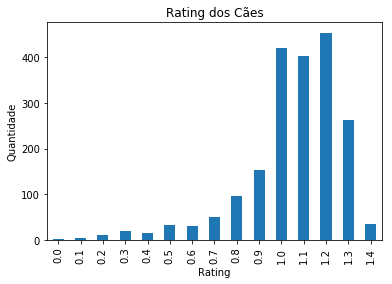

In [70]:
df['rating'].value_counts()[df['rating'].value_counts()>1].sort_index().plot.bar()
plt.title('Rating dos Cães')
plt.xlabel('Rating')
plt.ylabel('Quantidade')
plt.show()

O gráfico mostra que a maioria dos cães possuem rating entre 1,0 e 1,2



_____



### Como se divide em termos percentuais as categorias de cães

In [86]:
# contagem das categorias de cães
dog_class = df['dog_class'].value_counts()
dog_class

None              1686
pupper            203 
doggo             63  
puppo             22  
doggo, pupper     9   
floofer           7   
doggo, puppo      1   
doggo, floofer    1   
Name: dog_class, dtype: int64

In [87]:
dog_class.sum()

1992

In [89]:
# eliminando a categoria 'None'
dog_class = dog_class.drop(labels=['None'])
dog_class

pupper            203
doggo             63 
puppo             22 
doggo, pupper     9  
floofer           7  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_class, dtype: int64

In [90]:
dog_class.sum()

306

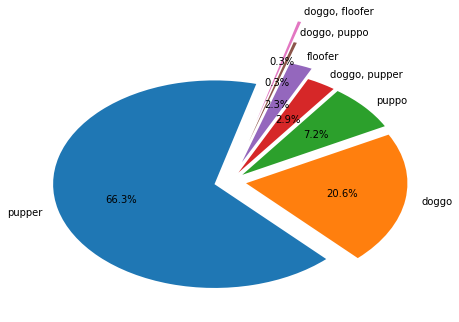

In [73]:
# Criando um gráfico de segmentos (pizza) com a classificação dos cães que possuem um categoria (ou mais de uma)
plt.pie(
    dog_class,
    labels=dog_class.index,
    shadow=False,
    #colors=colors,
    explode=(0.1, 0.1, 0.1, 0.1, 0.2, 0.4, 0.6),
    startangle=75,
    # fração
    autopct='%1.1f%%',
    )

#plt.axis('equal') #para confirmar que o gráfico é um círculo.

plt.tight_layout()
plt.show()

O gráfico acima apresenta a divisão das categorias dos cães por percentual. A maior categoria encontrada foi a dos "pupper" com 66,4%.



_____



### As categorias de cães versus rating

#### Rating médio por categoria

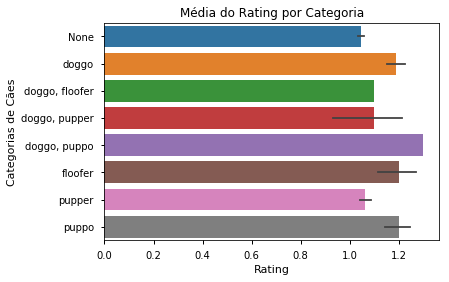

In [129]:
# Criando um gráfico de barras mostrando as categorias de cães versus rating

ax = sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
ax = sns.barplot(y='dog_class', x='rating', data=filtered_rating)
ax.set_title('Média do Rating por Categoria')
ax.set_ylabel('Categorias de Cães')
ax.set_xlabel('Rating')
plt.show()

# incluso 'None'

O gráfico anterior apresenta a média dos ratings das categorias dos cães, cujos tweets aprensetaram os nomes das categorias.

_______

#### Rating acumulado por categoria

In [135]:
grouped = filtered_rating['rating'].groupby(filtered_rating['dog_class']).sum().sort_values()

In [136]:
# Manter somentes as categorias já encontradas em 'dog_class'
grouped1 = grouped[dog_class.index]

grouped1.describe

<bound method NDFrame.describe of dog_class
pupper            215.9
doggo             74.9 
puppo             26.4 
doggo, pupper     9.9  
floofer           8.4  
doggo, puppo      1.3  
doggo, floofer    1.1  
Name: rating, dtype: float64>

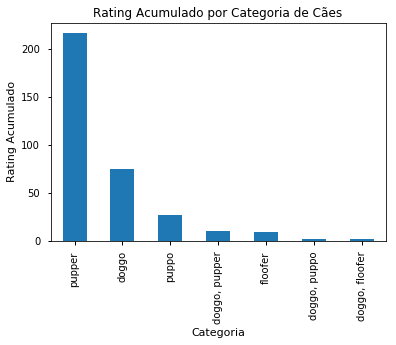

In [138]:
grouped1.plot.bar()
plt.title('Rating Acumulado por Categoria de Cães')
plt.xlabel('Categoria')
plt.ylabel('Rating Acumulado')
plt.show()



_______


### Total da contagem de favoritos por classificação dos cães

In [140]:
# Agrupamento favoritos e classificação dos cães
grouped = df['favorite_count'].groupby(df['dog_class']).sum().sort_values()

# Manter somentes as categorias já encontradas em 'dog_class'
grouped1 = grouped[dog_class.index]

grouped1.describe

<bound method NDFrame.describe of dog_class
pupper            1448836
doggo             1198384
puppo             488886 
doggo, pupper     112049 
floofer           90447  
doggo, puppo      46926  
doggo, floofer    16817  
Name: favorite_count, dtype: int64>

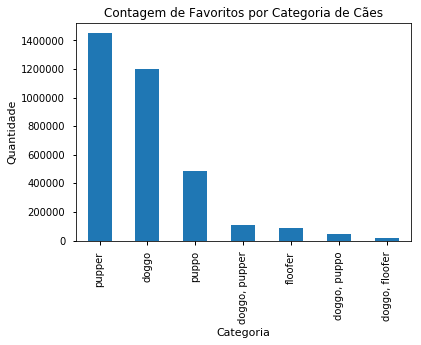

In [141]:
grouped1.plot.bar()
plt.title('Contagem de Favoritos por Categoria de Cães')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.show()

É possível observar no gráfico anterior que as duas categorias com maior quantidade de 'favoritos' são 'pupper' e 'doggo'.

______

### Save

In [142]:
# Salvar o DataFrame em um arquivo csv
df.to_csv('twitter_archive_master.csv')